## **N^2 - 1 Puzzle Problem**
Write a Python/ Java/ C/ C++ program to solve the (n^2 − 1)-puzzle problem using the following search algorithms:
- Uniform-Cost Search (UCS)
- Bidirectional Search

### 1. Uniform-Cost Search (UCS)


Testing for n=2

Trial 1/10 for 2x2 puzzle
Initial State:
1 3
2 0

Goal State:
1 2
3 0
Timeout or no solution

Trial 2/10 for 2x2 puzzle
Initial State:
3 1
0 2

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: U R D

Trial 3/10 for 2x2 puzzle
Initial State:
3 1
2 0

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: L U R D

Trial 4/10 for 2x2 puzzle
Initial State:
2 0
3 1

Goal State:
1 2
3 0
Timeout or no solution

Trial 5/10 for 2x2 puzzle
Initial State:
3 0
2 1

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: D L U R D

Trial 6/10 for 2x2 puzzle
Initial State:
1 3
2 0

Goal State:
1 2
3 0
Timeout or no solution

Trial 7/10 for 2x2 puzzle
Initial State:
0 1
3 2

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: R D

Trial 8/10 for 2x2 puzzle
Initial State:
2 1
3 0

Goal State:
1 2
3 0
Timeout or no solution

Trial 9/10 for 2x2 puzzle
Initial State:
1 0
3 2

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: D

Trial 10/10 for 2x2 puzzle
Initial State:
3 2
0 1

Goal State:
1 2
3 0


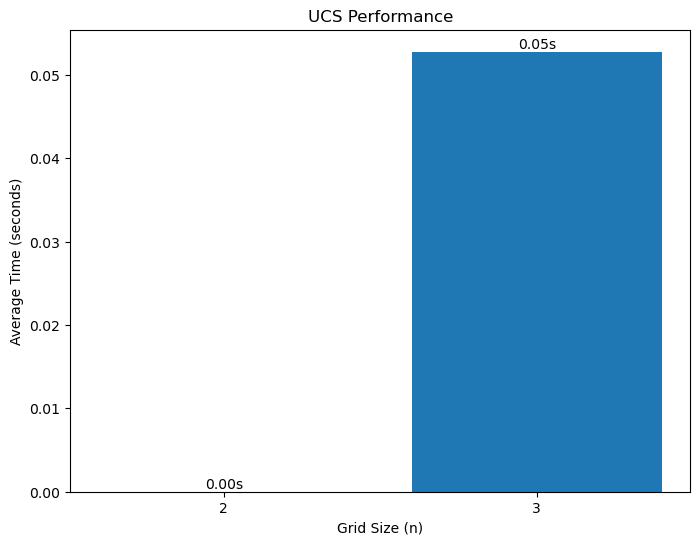

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import deque
import heapq
import random

class PuzzleState:
    def __init__(self, state, parent=None, action=None, cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost
        self.size = len(state)
        
    def __str__(self):
        return '\n'.join([' '.join(map(str, row)) for row in self.state])
        
    def find_blank(self):
        return next((i, j) for i in range(self.size) 
                   for j in range(self.size) if self.state[i][j] == 0)

def generate_random_state(n):
    numbers = list(range(n*n))
    random.shuffle(numbers)
    return [numbers[i:i+n] for i in range(0, n*n, n)]

def get_successors(node):
    blank_i, blank_j = node.find_blank()
    moves = [(0, 1, 'R'), (1, 0, 'D'), (0, -1, 'L'), (-1, 0, 'U')]
    successors = []
    
    for di, dj, action in moves:
        new_i, new_j = blank_i + di, blank_j + dj
        if 0 <= new_i < node.size and 0 <= new_j < node.size:
            new_state = [row[:] for row in node.state]
            new_state[blank_i][blank_j], new_state[new_i][new_j] = \
                new_state[new_i][new_j], new_state[blank_i][blank_j]
            successors.append(PuzzleState(new_state, node, action, node.cost + 1))
    return successors

def get_inversions(state):
    flat = []
    for i in range(len(state)):
        for j in range(len(state)):
            if state[i][j] != 0:
                flat.append(state[i][j])
    
    inversions = 0
    for i in range(len(flat)):
        for j in range(i + 1, len(flat)):
            if flat[i] > flat[j]:
                inversions += 1
    return inversions

def is_solvable(state):
    n = len(state)
    inversions = get_inversions(state)
    
    blank_row = 0
    for i in range(n-1, -1, -1):
        for j in range(n):
            if state[i][j] == 0:
                blank_row = n - i
                break
    
    if n % 2 == 1:
        return inversions % 2 == 0
    else:
        if blank_row % 2 == 0:
            return inversions % 2 == 1
        else:
            return inversions % 2 == 0

def manhattan_distance(state, goal):
    n = len(state)
    distance = 0
    goal_pos = {}
    for i in range(n):
        for j in range(n):
            goal_pos[goal[i][j]] = (i, j)
    
    for i in range(n):
        for j in range(n):
            if state[i][j] != 0:
                gi, gj = goal_pos[state[i][j]]
                distance += abs(i - gi) + abs(j - gj)
    return distance

def ucs_solve(initial_state, goal_state, timeout=60):
    if not is_solvable(initial_state):
        return None, 0
        
    start_time = time.time()
    initial = PuzzleState(initial_state, cost=0)
    frontier = [(0, id(initial), initial)]  # (cost, unique_id, state)
    heapq.heapify(frontier)
    visited = set()
    
    while frontier and (time.time() - start_time) < timeout:
        cost, _, current = heapq.heappop(frontier)
        state_tuple = tuple(map(tuple, current.state))
        
        if current.state == goal_state:
            path = []
            while current.parent:
                path.append(current.action)
                current = current.parent
            return path[::-1], time.time() - start_time
            
        if state_tuple not in visited:
            visited.add(state_tuple)
            for successor in get_successors(current):
                if tuple(map(tuple, successor.state)) not in visited:
                    heapq.heappush(frontier, 
                                 (successor.cost + manhattan_distance(successor.state, goal_state),
                                  id(successor),
                                  successor))
    
    return None, time.time() - start_time

def run_ucs_experiment(n):
    goal_state = [[i + 1 if i < n*n-1 else 0 for i in range(j*n, (j+1)*n)] 
                 for j in range(n)]
    
    results = []
    timeouts = 0
    initial_states = [generate_random_state(n) for _ in range(10)]
    
    for i, init_state in enumerate(initial_states, 1):
        print(f"\nTrial {i}/10 for {n}x{n} puzzle")
        print("Initial State:")
        print(PuzzleState(init_state))
        print("\nGoal State:")
        print(PuzzleState(goal_state))
        solution, solve_time = ucs_solve(init_state, goal_state)
        if solution is not None and solve_time < 60:
            results.append(solve_time)
            print(f"Solved in {solve_time:.2f} seconds")
            print("Moves:", ' '.join(solution))
        else:
            timeouts += 1
            print("Timeout or no solution")
    
    if results:
        avg_time = sum(results) / len(results)
        std_dev = np.std(results) if len(results) > 1 else 0
        print(f"\nResults for n={n}:")
        print(f"Average time: {avg_time:.2f} seconds")
        print(f"Standard deviation: {std_dev:.2f}")
        print(f"Successful solves: {len(results)}/10")
        return avg_time, std_dev, len(results)
    return None, None, 0

def main():
    n_values = [2, 3]
    times = []
    
    for n in n_values:
        print(f"\nTesting for n={n}")
        avg_time, std_dev, successes = run_ucs_experiment(n)
        if avg_time is not None:
            times.append(avg_time)
    
    plt.figure(figsize=(8, 6))
    plt.bar(n_values[:len(times)], times)
    plt.xlabel('Grid Size (n)')
    plt.ylabel('Average Time (seconds)')
    plt.title('UCS Performance')
    plt.xticks(n_values)
    
    for i, v in enumerate(times):
        plt.text(n_values[i], v, f'{v:.2f}s', 
                ha='center', va='bottom')
    
    plt.savefig('ucs_results.png')
    plt.show()

if __name__ == "__main__":
    main()

### 2. Bidirectional Search


Testing for n=2

Trial 1/10 for 2x2 puzzle
Initial State:
0 3
1 2

Goal State:
1 2
3 0
Timeout or no solution

Trial 2/10 for 2x2 puzzle
Initial State:
2 3
1 0

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: U L R D

Trial 3/10 for 2x2 puzzle
Initial State:
1 2
3 0

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: 

Trial 4/10 for 2x2 puzzle
Initial State:
0 2
3 1

Goal State:
1 2
3 0
Timeout or no solution

Trial 5/10 for 2x2 puzzle
Initial State:
3 1
2 0

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: L U D R

Trial 6/10 for 2x2 puzzle
Initial State:
0 2
1 3

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: D R

Trial 7/10 for 2x2 puzzle
Initial State:
0 3
2 1

Goal State:
1 2
3 0
Solved in 0.00 seconds
Moves: R D L D R U

Trial 8/10 for 2x2 puzzle
Initial State:
3 0
1 2

Goal State:
1 2
3 0
Timeout or no solution

Trial 9/10 for 2x2 puzzle
Initial State:
1 3
0 2

Goal State:
1 2
3 0
Timeout or no solution

Trial 10/10 for 2x2 puzzle
Initial State:
3 1
0 2

Goal State:
1 2
3

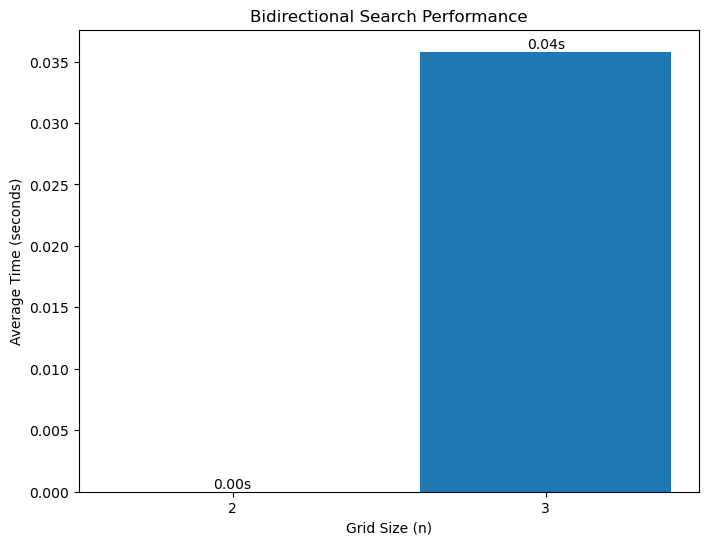

In [7]:
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import deque
import random

class PuzzleState:
    def __init__(self, state, parent=None, action=None):
        self.state = state
        self.parent = parent
        self.action = action
        self.size = len(state)
        
    def __str__(self):
        return '\n'.join([' '.join(map(str, row)) for row in self.state])
        
    def find_blank(self):
        return next((i, j) for i in range(self.size) 
                   for j in range(self.size) if self.state[i][j] == 0)

def generate_random_state(n):
    numbers = list(range(n*n))
    random.shuffle(numbers)
    return [numbers[i:i+n] for i in range(0, n*n, n)]

def get_successors(node):
    blank_i, blank_j = node.find_blank()
    moves = [(0, 1, 'R'), (1, 0, 'D'), (0, -1, 'L'), (-1, 0, 'U')]
    successors = []
    
    for di, dj, action in moves:
        new_i, new_j = blank_i + di, blank_j + dj
        if 0 <= new_i < node.size and 0 <= new_j < node.size:
            new_state = [row[:] for row in node.state]
            new_state[blank_i][blank_j], new_state[new_i][new_j] = \
                new_state[new_i][new_j], new_state[blank_i][blank_j]
            successors.append(PuzzleState(new_state, node, action))
    return successors

def get_predecessors(node):
    successors = get_successors(node)
    for s in successors:
        if s.action == 'U': s.action = 'D'
        elif s.action == 'D': s.action = 'U'
        elif s.action == 'L': s.action = 'R'
        elif s.action == 'R': s.action = 'L'
    return successors

def get_inversions(state):
    flat = []
    for i in range(len(state)):
        for j in range(len(state)):
            if state[i][j] != 0:
                flat.append(state[i][j])
    
    inversions = 0
    for i in range(len(flat)):
        for j in range(i + 1, len(flat)):
            if flat[i] > flat[j]:
                inversions += 1
    return inversions

def is_solvable(state):
    n = len(state)
    inversions = get_inversions(state)
    
    blank_row = 0
    for i in range(n-1, -1, -1):
        for j in range(n):
            if state[i][j] == 0:
                blank_row = n - i
                break
    
    if n % 2 == 1:
        return inversions % 2 == 0
    else:
        if blank_row % 2 == 0:
            return inversions % 2 == 1
        else:
            return inversions % 2 == 0

def manhattan_distance(state, goal):
    n = len(state)
    distance = 0
    goal_pos = {}
    for i in range(n):
        for j in range(n):
            goal_pos[goal[i][j]] = (i, j)
    
    for i in range(n):
        for j in range(n):
            if state[i][j] != 0:
                gi, gj = goal_pos[state[i][j]]
                distance += abs(i - gi) + abs(j - gj)
    return distance

def bidirectional_solve(initial_state, goal_state, timeout=60):
    if not is_solvable(initial_state):
        return None, 0
        
    start_time = time.time()
    
    # Forward search from initial state
    initial = PuzzleState(initial_state)
    goal = PuzzleState(goal_state)
    
    forward_queue = deque([initial])
    forward_visited = {tuple(map(tuple, initial_state)): initial}
    
    backward_queue = deque([goal])
    backward_visited = {tuple(map(tuple, goal_state)): goal}
    
    while forward_queue and backward_queue and (time.time() - start_time) < timeout:
        # Forward search step
        current = forward_queue.popleft()
        current_state = tuple(map(tuple, current.state))
        
        if current_state in backward_visited:
            return reconstruct_bidirectional_path(current, backward_visited[current_state]), time.time() - start_time
            
        for successor in get_successors(current):
            succ_state = tuple(map(tuple, successor.state))
            if succ_state not in forward_visited:
                forward_visited[succ_state] = successor
                forward_queue.append(successor)
        
        # Backward search step
        current = backward_queue.popleft()
        current_state = tuple(map(tuple, current.state))
        
        if current_state in forward_visited:
            return reconstruct_bidirectional_path(forward_visited[current_state], current), time.time() - start_time
            
        for successor in get_successors(current):
            succ_state = tuple(map(tuple, successor.state))
            if succ_state not in backward_visited:
                backward_visited[succ_state] = successor
                backward_queue.append(successor)
    
    return None, time.time() - start_time

def reconstruct_bidirectional_path(forward_node, backward_node):
    # Get path from initial to meeting point
    forward_path = []
    current = forward_node
    while current.parent:
        forward_path.append(current.action)
        current = current.parent
    forward_path = forward_path[::-1]
    
    # Get path from meeting point to goal
    backward_path = []
    current = backward_node
    while current.parent:
        if current.action == 'U': backward_path.append('D')
        elif current.action == 'D': backward_path.append('U')
        elif current.action == 'L': backward_path.append('R')
        elif current.action == 'R': backward_path.append('L')
        current = current.parent
    
    return forward_path + backward_path[::-1]

def run_bidirectional_experiment(n):
    goal_state = [[i + 1 if i < n*n-1 else 0 for i in range(j*n, (j+1)*n)] 
                 for j in range(n)]
    
    results = []
    timeouts = 0
    initial_states = [generate_random_state(n) for _ in range(10)]
    
    for i, init_state in enumerate(initial_states, 1):
        print(f"\nTrial {i}/10 for {n}x{n} puzzle")
        print("Initial State:")
        print(PuzzleState(init_state))
        print("\nGoal State:")
        print(PuzzleState(goal_state))
        solution, solve_time = bidirectional_solve(init_state, goal_state)
        if solution is not None and solve_time < 60:
            results.append(solve_time)
            print(f"Solved in {solve_time:.2f} seconds")
            print("Moves:", ' '.join(solution))
        else:
            timeouts += 1
            print("Timeout or no solution")
    
    if results:
        avg_time = sum(results) / len(results)
        std_dev = np.std(results) if len(results) > 1 else 0
        print(f"\nResults for n={n}:")
        print(f"Average time: {avg_time:.2f} seconds")
        print(f"Standard deviation: {std_dev:.2f}")
        print(f"Successful solves: {len(results)}/10")
        return avg_time, std_dev, len(results)
    return None, None, 0

def main():
    n_values = [2, 3]
    times = []
    
    for n in n_values:
        print(f"\nTesting for n={n}")
        avg_time, std_dev, successes = run_bidirectional_experiment(n)
        if avg_time is not None:
            times.append(avg_time)
    
    plt.figure(figsize=(8, 6))
    plt.bar(n_values[:len(times)], times)
    plt.xlabel('Grid Size (n)')
    plt.ylabel('Average Time (seconds)')
    plt.title('Bidirectional Search Performance')
    plt.xticks(n_values)
    
    for i, v in enumerate(times):
        plt.text(n_values[i], v, f'{v:.2f}s', 
                ha='center', va='bottom')
    
    plt.savefig('bidirectional_results.png')
    plt.show()

if __name__ == "__main__":
    main()